# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?


The goal is to predict if a client will subscribe the deposit, not regarding which amount is retained, turning it a classification task.

The dataset collected is related to 17 campaigns that occurred between May 2008 and November 2010, corresponding to a total of 79354 contacts.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd

In [30]:
## Save notebook environment so don't have to re run everytime

import sys
print(sys.path)
sys.path.append('/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages')
print(sys.path)


['/Users/apekshasridhar/Downloads', '/Users/apekshasridhar/opt/anaconda3/lib/python39.zip', '/Users/apekshasridhar/opt/anaconda3/lib/python3.9', '/Users/apekshasridhar/opt/anaconda3/lib/python3.9/lib-dynload', '', '/Users/apekshasridhar/opt/anaconda3/lib/python3.9/site-packages', '/Users/apekshasridhar/opt/anaconda3/lib/python3.9/site-packages/aeosa', '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages', '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages']
['/Users/apekshasridhar/Downloads', '/Users/apekshasridhar/opt/anaconda3/lib/python39.zip', '/Users/apekshasridhar/opt/anaconda3/lib/python3.9', '/Users/apekshasridhar/opt/anaconda3/lib/python3.9/lib-dynload', '', '/Users/apekshasridhar/opt/anaconda3/lib/python3.9/site-packages', '/Users/apekshasridhar/opt/anaconda3/lib/python3.9/site-packages/aeosa', '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages', '/Library/Frameworks/Python.framework/Versi

In [28]:
import dill
dill.dump_session('PA17_env.db')

In [1]:
## Load saved notebook environment

import sys
print(sys.path)
sys.path.append('/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages')
print(sys.path)

import dill
dill.load_session('PA17_env.db')


['/Users/apekshasridhar/Downloads', '/Users/apekshasridhar/opt/anaconda3/lib/python39.zip', '/Users/apekshasridhar/opt/anaconda3/lib/python3.9', '/Users/apekshasridhar/opt/anaconda3/lib/python3.9/lib-dynload', '', '/Users/apekshasridhar/opt/anaconda3/lib/python3.9/site-packages', '/Users/apekshasridhar/opt/anaconda3/lib/python3.9/site-packages/aeosa']
['/Users/apekshasridhar/Downloads', '/Users/apekshasridhar/opt/anaconda3/lib/python39.zip', '/Users/apekshasridhar/opt/anaconda3/lib/python3.9', '/Users/apekshasridhar/opt/anaconda3/lib/python3.9/lib-dynload', '', '/Users/apekshasridhar/opt/anaconda3/lib/python3.9/site-packages', '/Users/apekshasridhar/opt/anaconda3/lib/python3.9/site-packages/aeosa', '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages']


In [4]:
df = pd.read_csv('/Users/apekshasridhar/Downloads/module_17_starter/data/bank-additional-full.csv', sep = ';')


In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [6]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

*No missing data*

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

*All columns have the correct dtypes*

Examine number of classes in target variable

In [8]:
df.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

*Note: We have imbalanced data*

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

Starting on the Business Understanding phase (of the CRISP-DM), it was clear that the goal was to increase efficiency of directed campaigns for long-term deposit subscriptions by reducing the number of contacts to do.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [37]:
X = pd.get_dummies(df[['age', 'job' , 'marital', 'education', 'default', 'housing', 'loan']])
y = df['y']
print(X.columns)

Index(['age', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes'],
      dtype='object')


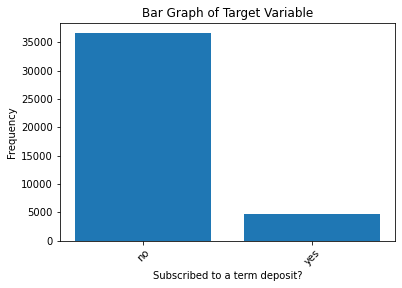

In [10]:
import matplotlib.pyplot as plt

# Create a bar plot of y
plt.bar(y.unique(), y.value_counts())

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Add labels and title to the plot
plt.xlabel('Subscribed to a term deposit?')
plt.ylabel('Frequency')
plt.title('Bar Graph of Target Variable')

# Show the plot
plt.show()

*Classes are VERY imbalanced with very few positive results*

Check for multicolinearity

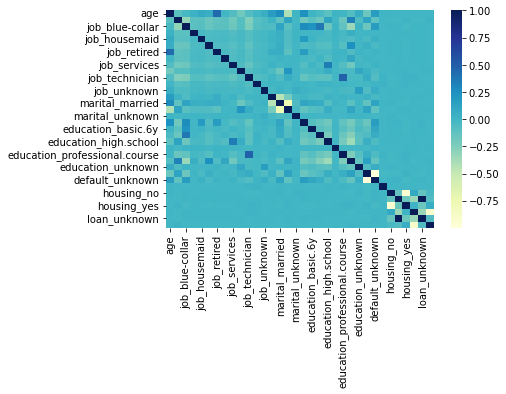

In [11]:
import seaborn as sns

sns.heatmap(X.corr(), cmap="YlGnBu")
plt.show()


*There doesn't seem to be very high correlations in the features.*

*We can drop the following columns: job_unknown, marital_unknown, education_unknown, default_unknown, housing_unknown, loan_unknown*

In [38]:
X = X.drop(columns = ['job_unknown', 'marital_unknown', 'education_unknown', 'default_unknown', 'housing_unknown', 'loan_unknown'], axis = 1)
X.columns

Index(['age', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_basic.4y', 'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'default_no', 'default_yes', 'housing_no', 'housing_yes', 'loan_no',
       'loan_yes'],
      dtype='object')

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 22)

In [14]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(28831, 28) (12357, 28) (28831,) (12357,)


*The train and test samples look good to go!*

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

We will use a DummyClassifier to build the baseline model.

In [15]:
%%time

from sklearn.dummy import DummyClassifier
from sklearn.metrics import make_scorer


# Create a dummy classifier as a baseline model
dummy = DummyClassifier(strategy='most_frequent')

# Fit the model to the training data
dummy.fit(X_train, y_train)

# Evaluate the accuracy of the model on the testing data
accuracy = dummy.score(X_test, y_test)
#precision = precision_score(dummy.predict(X_test), y_test, pos_label = 'yes', zero_division = 1)


print("Baseline accuracy: {:.4f}".format(accuracy))

Baseline accuracy: 0.8844
CPU times: user 51.2 ms, sys: 16.2 ms, total: 67.4 ms
Wall time: 70.6 ms


The baseline performance that our classifier should aim to beat is 0.88 accuracy.

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

#### Logistic Regression

In [16]:
%%time

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lgr = LogisticRegression(max_iter = 1000).fit(X_train, y_train)

CPU times: user 4.71 s, sys: 149 ms, total: 4.86 s
Wall time: 1.55 s


*I scaled the data and changed max_iter because it wasn't converging otehrwise*

### Problem 9: Score the Model

What is the accuracy of your model?

In [17]:
print("Logistic Regression accuracy: {:.4f}".format(lgr.score(X_test, y_test)))

Logistic Regression accuracy: 0.8844


*The accuracy of the model is 88%, same as the baseline model.*

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

#### KNN Model

In [18]:
%%time

from sklearn.neighbors import KNeighborsClassifier

# Instantiate the classifier 
knn = KNeighborsClassifier()

# Train the model using the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
print("KNN accuracy: {:.4f}".format(knn.score(X_test, y_test)))
#print("KNN precision: {:.4f}".format(precision_score(y_test, knn.predict(X_test), pos_label='yes', zero_division=1)))


KNN accuracy: 0.8734
CPU times: user 12 s, sys: 10.5 s, total: 22.4 s
Wall time: 29.7 s


#### Decision Tree Model

In [19]:
%%time

from sklearn.tree import DecisionTreeClassifier

# Instantiate the classifier with max depth of 3
dt = DecisionTreeClassifier()

# Train the model using the training data
dt.fit(X_train, y_train)

# Make predictions on the test data
print("Decision Tree accuracy: {:.4f}".format(dt.score(X_test, y_test)))

Decision Tree accuracy: 0.8623
CPU times: user 236 ms, sys: 95.9 ms, total: 332 ms
Wall time: 1.19 s


#### SVM Model

In [21]:
%%time

from sklearn.svm import SVC

# Instantiate the classifier with a linear kernel
svc = SVC()

# Train the model using the training data
svc.fit(X_train, y_train)

# Make predictions on the test data
print("SVC accuracy: {:.4f}".format(svc.score(X_test, y_test)))

SVC accuracy: 0.8844
CPU times: user 30.6 s, sys: 1.1 s, total: 31.7 s
Wall time: 32.7 s


In [22]:
performance_df = pd.DataFrame({'Model': ['Baseline', 'Logistic Regression', 'KNN', 'Decision Tree', 'SVM'],
                              'Train Time': [77.4, 2800, 30800, 714, 34800],
                              'Train Accuracy': [dummy.score(X_train,y_train), lgr.score(X_train,y_train), knn.score(X_train,y_train), dt.score(X_train,y_train), svc.score(X_train,y_train)],
                              'Test Accuracy': [dummy.score(X_test,y_test), lgr.score(X_test,y_test), knn.score(X_test,y_test), dt.score(X_test,y_test), svc.score(X_test,y_test)]})



In [23]:
performance_df

,Model,Train Time,Train Accuracy,Test Accuracy
0,Baseline,77.4,0.888592,0.884438
1,Logistic Regression,2800.0,0.888592,0.884438
2,KNN,30800.0,0.891540,0.873351
3,Decision Tree,714.0,0.918629,0.862264
4,SVM,34800.0,0.888592,0.884438


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

#### Feature Engineering

Using permutation_importance to find out the inportance of features

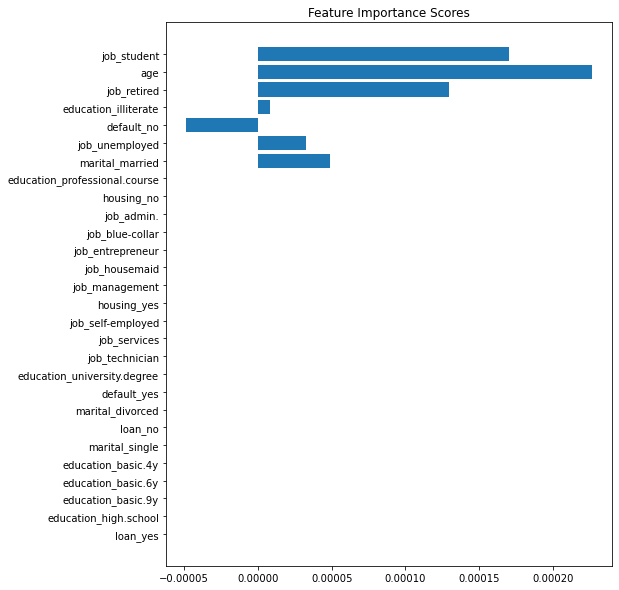

In [40]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Create a dummy classifier as a baseline model
dummy = LogisticRegression(max_iter = 1000).fit(X_train, y_train)


# Compute feature importance using permutation importance
result = permutation_importance(dummy, X_test, y_test, n_repeats=10, random_state=42)

# Extract the feature importance scores and their indices
feature_importance = result.importances_mean
feature_indices = result.importances_std.argsort()

# Plot the feature importances
fig, ax = plt.subplots(figsize=(8, 10))
ax.barh(range(len(feature_indices)), feature_importance[feature_indices])
ax.set_yticks(range(len(feature_indices)))
ax.set_yticklabels(X_test.columns[feature_indices])
ax.set_title("Feature Importance Scores")
plt.show()

The important features to include are job_student, age, job_retired, education_illiterate, default_no, job_unemployed and marital_maried. 

So for the next round of models, we will only use these features.

In [26]:
X_new = X[['job_student', 'age', 'job_retired', 'education_illiterate', 'default_no', 'job_unemployed', 'marital_married']]
X_new.columns

Index(['job_student', 'age', 'job_retired', 'education_illiterate',
       'default_no', 'job_unemployed', 'marital_married'],
      dtype='object')

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.3, random_state = 22)

### Grid Search for Hyperparameters

#### Appropriate performance metric

When dealing with imbalanced datasets, accuracy may not be the best metric to evaluate the performance of a classification model, especially if the positive class (the one with a very small number of instances) is the one of interest. This is because the model can achieve a high accuracy simply by predicting the majority class for all instances, thus completely ignoring the positive class.

Recall, on the other hand, focuses specifically on the ability of the model to correctly identify the positive class, regardless of the number of true negatives predicted. In other words, recall measures the percentage of positive instances that are correctly predicted by the model. Therefore, recall can be a more appropriate metric in scenarios where the positive class is rare or under-represented in the dataset.

In summary, recall is preferred in imbalanced classification problems because it prioritizes correctly identifying the positive instances, even at the cost of incorrectly predicting some negative instances.

#### Logistic Regression

In [21]:
%%time

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score

# Define parameter grid to search over
param_grid = {'C': [0.1, 0.5, 0.75, 1], 'penalty': ['l2']}

# Define class weights
class_weights = {'no': 1, 'yes': 10}

# Create logistic regression object
lr = LogisticRegression(class_weight = class_weights, max_iter = 1000)

scorer = make_scorer(recall_score, pos_label='yes', zero_division=1)

# Create GridSearchCV object
grid_lgr = GridSearchCV(lr, param_grid, cv=5, scoring = scorer)

# Fit the GridSearchCV object to the data
grid_lgr.fit(X_train, y_train)

# Print best hyperparameters and corresponding accuracy score
print("Best hyperparameters: ", grid_lgr.best_params_)

Best hyperparameters:  {'C': 0.1, 'penalty': 'l2'}
CPU times: user 24.3 s, sys: 1.1 s, total: 25.4 s
Wall time: 11.4 s


*Used class weights to account for imabalanced data*

#### KNN

In [23]:
%%time

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the KNN model
knn_2 = KNeighborsClassifier()

# Define the hyperparameter grid to search over
param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27], 'weights': ['distance', 'uniform']}

# Perform the grid search with 5-fold cross-validation
grid_knn = GridSearchCV(knn_2, param_grid, cv=5, scoring = scorer)

# Fit the grid search to the data
grid_knn.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters: ", grid_knn.best_params_)


Best Parameters:  {'n_neighbors': 3, 'weights': 'uniform'}
CPU times: user 37.4 s, sys: 496 ms, total: 37.9 s
Wall time: 39.8 s


#### Decision Tree

In [24]:
%%time

dtc = DecisionTreeClassifier()

# define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 4, 5, 6, 7,8, 9, 10, 11, 12, 20, 40],
    'min_samples_leaf': [1, 2, 3, 4, 5, 10],
    'min_samples_split': [2, 3, 4, 5, 6, 10]
}

# create the GridSearchCV object
grid_dtc = GridSearchCV(dtc, param_grid, cv=5, scoring = scorer)

# fit the GridSearchCV object to the data
grid_dtc.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters: ", grid_dtc.best_params_)

Best Parameters:  {'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 4, 'min_samples_split': 2}
CPU times: user 6min 35s, sys: 10.5 s, total: 6min 45s
Wall time: 8min 57s


#### SVM

In [26]:
%%time

param_grid = {'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}

# Create SVM classifier
svm = SVC(class_weight= 'balanced')
scorer = make_scorer(recall_score, pos_label='yes', zero_division=1)


# Create GridSearchCV object
grid_svm = GridSearchCV(svm, param_grid, cv=5, refit='recall', scoring = scorer)


CPU times: user 162 µs, sys: 1.73 ms, total: 1.89 ms
Wall time: 4.14 ms


In [27]:

# Fit GridSearchCV object to data
grid_svm.fit(X_train, y_train)

# Print best parameters and score
print("Best parameters: ", grid_svm.best_params_)

Best parameters:  {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}


Save all variables

In [29]:
import pickle

# Save variables to file
with open('my_variables.pkl', 'wb') as f:
    pickle.dump([lgr, knn, dt, svc, grid_lgr, grid_knn, grid_dtc, grid_svm], f)

# Load variables from file
# with open('my_variables.pkl', 'rb') as f:
#     lgr, knn, dt, svc, grid_lgr, grid_knn, grid_dtc, grid_svm = pickle.load(f)

# print('Done')

Dataframe of the precision scores for all the models.

In [32]:
from sklearn.metrics import precision_score

recall_df = pd.DataFrame({'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'SVM'],
                              'Train Precision': [recall_score(y_train, grid_lgr.predict(X_train),pos_label='yes'), recall_score(y_train, grid_knn.predict(X_train),pos_label='yes'), recall_score(y_train, grid_dtc.predict(X_train),pos_label='yes'), recall_score(y_train, grid_svm.predict(X_train),pos_label='yes')],
                              'Test Precision': [recall_score(y_test, grid_lgr.predict(X_test),pos_label='yes'), recall_score(y_test, grid_knn.predict(X_test),pos_label='yes'), recall_score(y_test, grid_dtc.predict(X_test),pos_label='yes'), recall_score(y_test, grid_svm.predict(X_test),pos_label='yes')]})



In [33]:
recall_df

,Model,Train Precision,Test Precision
0,Logistic Regression,0.913138,0.918067
1,KNN,0.094022,0.079132
2,Decision Tree,0.040473,0.027311
3,SVM,0.903176,0.907563


Plot Confusion Matrices for better understanding of the model outputs.

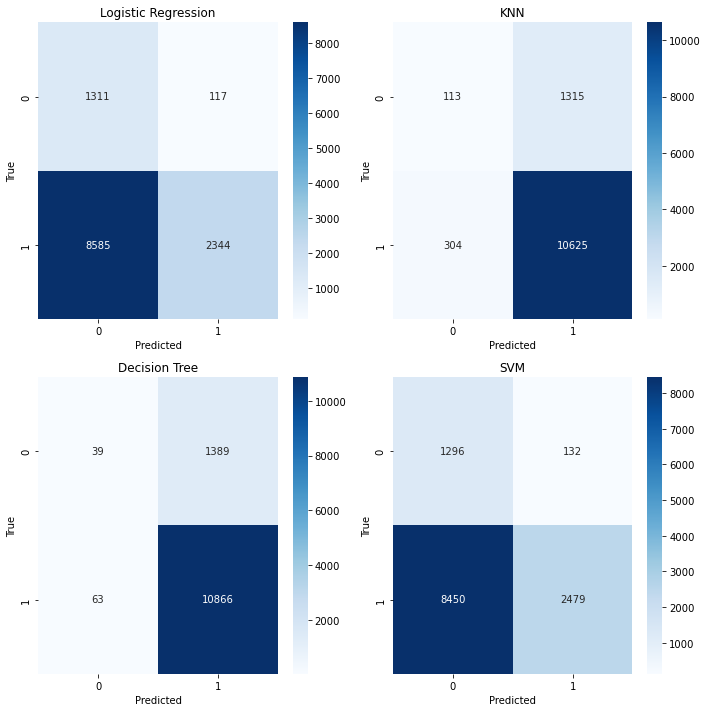

In [34]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# create subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

# set the title for the subplots
titles = ['Logistic Regression', 'KNN', 'Decision Tree', 'SVM']

# iterate through the models and plot confusion matrix
for idx, model in enumerate([grid_lgr, grid_knn, grid_dtc, grid_svm]):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels = ['yes' ,'no'])
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', ax=axs[idx//2, idx%2])
    axs[idx//2, idx%2].set_title(titles[idx])
    axs[idx//2, idx%2].set_xlabel('Predicted')
    axs[idx//2, idx%2].set_ylabel('True')
    
plt.tight_layout()
plt.show()


### Technical Results

1. Recall is the best metric to determine if a customer will subscribe to the campaign or not.
2. The classes were imabalnced, so KNN and decision tree did not work well considerimg there were very few positive classes.
3. Among the claasification models that I tested, Logistic Regression and SVM had the best recall score.
4. Look at next steps and recommendations to improve model results.

## Data Findings 

1. The most important bank information features that were selected are students, age, retired folks, illiterate, default_no, unemployed and married folks.
2. Using default parameters:
		a. the best accuracy models are Baseline, logistic regression and SVM models.
		b. the fastest models are Baseline and Decision Tree models.
3. After tuning for the best parameters:
		b. the best recall score models are Logistic Regression and SVM
4. Overall, for this task, the best model in my opinion is Logistic Regression, considering it also took the least amount of time.

## Business Findings

1. The features that are useful in predicting whether a customer will subscribe are not are whether the customer is a student, their age, whether they are retired, illiterate, don't have credit set to default, are unemployed and are married.

2. While most of the above customer characteristics positively predict the outcome, not having credit in default negatively predicts the outcome. 

3. More accuracte predictions can be made once more data is collected.

## Next Steps and Recommendations

1. Models are not very good due to the imbalance of classes. So next step could be to:
		a. Collect more data
		b. Undersample majority class
		c. Oversample the minority class
2. Try training the models with not just the bank information features but all the other features as well. 
3. Stratify the data during the train_test_split due to the imbalanced classes, which will possibly provide better precision scores.